In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings('ignore')

from torchsummary import summary

from pytorch_tools import train_model_cls, plot_metrics

In [2]:
train_transformer = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
val_transformer = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [3]:
train_dataset = datasets.ImageFolder(
    'data/Module_3_Lecture_2_hymenoptera_data/train',
    transform=train_transformer
)

val_dataset = datasets.ImageFolder(
    'data/Module_3_Lecture_2_hymenoptera_data/val',
    transform=val_transformer
)

In [4]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,  
    shuffle=True,   
    num_workers=0   
)
val_loader = DataLoader(
    val_dataset,
    batch_size=32, 
    shuffle=False, 
    num_workers=0
)

In [5]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print("Використовується пристрій:", device)

Використовується пристрій: mps


In [6]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model_ft.parameters(), lr=1e-05)

In [7]:
metrics, model = train_model_cls(
    num_classes=2,
    num_epoch=10,
    train_dataloader=train_loader,
    test_dataloader=val_loader,
    model=model_ft,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    info_every_iter=1,
    show_val_metrics=False
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10] Train Loss: 53.7130 Acc: 0.4877 Rec: 0.1570 Prec: 0.4524
Epoch [2/10] Train Loss: 50.6876 Acc: 0.6434 Rec: 0.3140 Prec: 0.9048
Epoch [3/10] Train Loss: 49.1530 Acc: 0.7623 Rec: 0.5289 Prec: 0.9846
Epoch [4/10] Train Loss: 48.4910 Acc: 0.8033 Rec: 0.6281 Prec: 0.9620
Epoch [5/10] Train Loss: 48.0121 Acc: 0.8484 Rec: 0.7355 Prec: 0.9468
Epoch [6/10] Train Loss: 46.7433 Acc: 0.9139 Rec: 0.8347 Prec: 0.9902
Epoch [7/10] Train Loss: 47.6551 Acc: 0.8975 Rec: 0.8182 Prec: 0.9706
Epoch [8/10] Train Loss: 45.8968 Acc: 0.9385 Rec: 0.8843 Prec: 0.9907
Epoch [9/10] Train Loss: 46.7076 Acc: 0.9139 Rec: 0.8512 Prec: 0.9717
Epoch [10/10] Train Loss: 46.4066 Acc: 0.9467 Rec: 0.9008 Prec: 0.9909


In [8]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
params = list(model_conv.parameters())
for param in params[:-10]:
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.Adam(model_conv.fc.parameters(), lr=1e-03)

In [9]:
summary(model_conv, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [10]:
model_conv

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
metrics, model = train_model_cls(
    num_classes=2,
    num_epoch=10,
    train_dataloader=train_loader,
    test_dataloader=val_loader,
    model=model_conv,
    criterion=criterion,
    optimizer=optimizer_conv,
    device=device,
    info_every_iter=1,
    show_val_metrics=True
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10] Train Loss: 52.7716 Acc: 0.5738 Rec: 0.9256 Prec: 0.5411
Epoch [1/10] Val Loss: 55.7713 Acc: 0.6863 Rec: 1.0000 Prec: 0.6336
Epoch [2/10] Train Loss: 49.5382 Acc: 0.6639 Rec: 0.9917 Prec: 0.5970
Epoch [2/10] Val Loss: 56.2844 Acc: 0.7712 Rec: 1.0000 Prec: 0.7034
Epoch [3/10] Train Loss: 47.6616 Acc: 0.7459 Rec: 0.9917 Prec: 0.6630
Epoch [3/10] Val Loss: 56.6527 Acc: 0.8366 Rec: 0.9880 Prec: 0.7736
Epoch [4/10] Train Loss: 47.8376 Acc: 0.8279 Rec: 0.9504 Prec: 0.7616
Epoch [4/10] Val Loss: 56.6799 Acc: 0.9216 Rec: 0.9759 Prec: 0.8901
Epoch [5/10] Train Loss: 46.8072 Acc: 0.8811 Rec: 0.9091 Prec: 0.8594
Epoch [5/10] Val Loss: 56.5218 Acc: 0.9150 Rec: 0.8795 Prec: 0.9605
Epoch [6/10] Train Loss: 48.3166 Acc: 0.8689 Rec: 0.8099 Prec: 0.9159
Epoch [6/10] Val Loss: 56.3750 Acc: 0.8824 Rec: 0.8072 Prec: 0.9710
Epoch [7/10] Train Loss: 47.9146 Acc: 0.8443 Rec: 0.7190 Prec: 0.9560
Epoch [7/10] Val Loss: 56.3091 Acc: 0.8889 Rec: 0.8193 Prec: 0.9714
Epoch [8/10] Train Loss: 46.8346 A

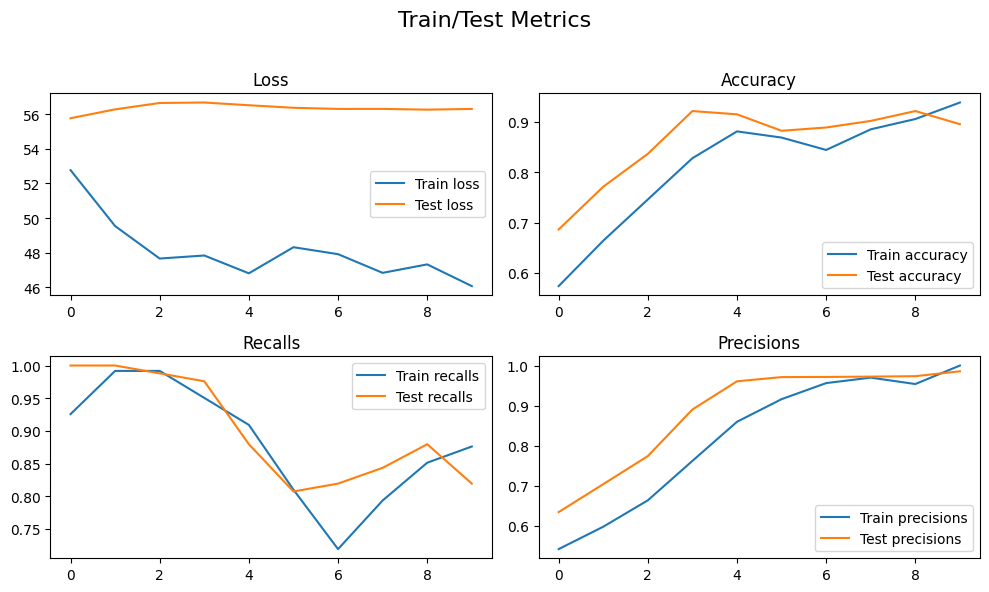

In [12]:
plot_metrics(metrics)